<a href="https://colab.research.google.com/github/salmaannissa/quiz-2-machine-learning-TI-3F/blob/main/28_SalmaAnnissa_Quiz-2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Check shape data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# Check shape labels
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [ ]:
# Check each data shape --> should be 28*28
train_data[0].shape

(28, 28)

In [ ]:
# Check the label
train_labels.shape

(60000,)

**Penjelasan** : Pada tahap ini dilakukan pengambilan dan pemeriksaan dataset MNIST menggunakan TensorFlow dan Keras

### Combine Train and Test Data

In [ ]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [ ]:
# Check data shape
digits_data.shape

(70000, 28, 28)

In [ ]:
# Check label shape
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 8')

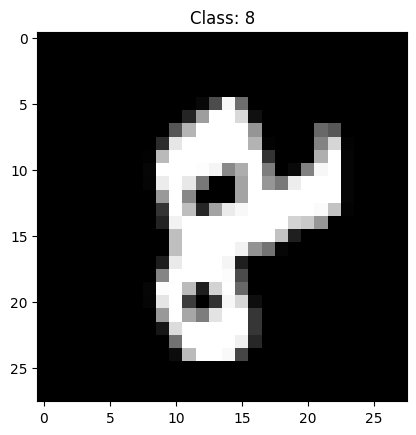

In [ ]:
# Randomly checking the data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

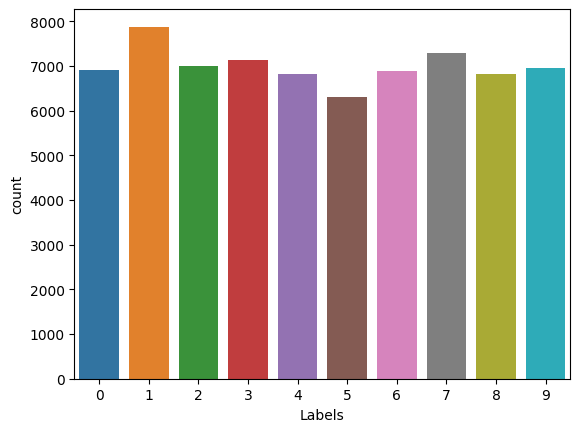

In [ ]:
# Check data distribution
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

**Penjelasan** : Pada tahap ini dilakukan penggabungan dan pemeriksaan dataset MNIST setelah dilakukan pemisahan antara data pelatihan dan data pengujian. Dataset berisi gambar-gambar digit tulisan tangan dan label-label yang sesuai.

## Load Kaggle A-Z

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-05 09:31:14--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M   181MB/s    in 1.0s    

2023-12-05 09:31:16 (181 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
# Extract zip file
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get pixel data only
alphabet_data = dataset_az.drop('0', axis=1)
# Get labels only
alphabet_labels = dataset_az['0']

In [ ]:
# Check shape data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [ ]:
# Check shape labels
alphabet_labels.shape

(372450,)

In [ ]:
# Reshape pixel data to 28*28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Check the result by its shape
alphabet_data.shape

(372450, 28, 28)

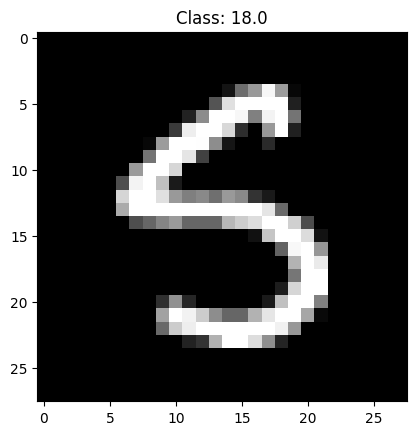

In [ ]:
# Randomly checking A-Z dataset
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

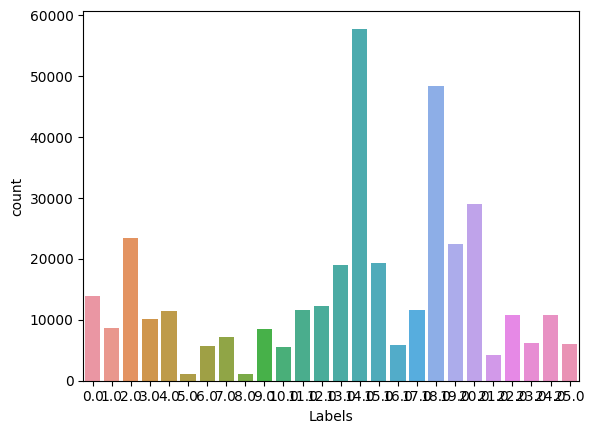

In [ ]:
# Check data distribution
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

**Penjelasan** : Pada tahap ini dilakukan pengunduhan dan persiapan dataset A-Z Handwritten. Hal pertama yang dilakukan yaitu mengunduh dan mengekstrak dataset lalu membaca dataset dari file CSV. Selanjutkan mengambil data piksel dan label dari dataset dan memeriksanya. Tahap berikutnya melakukan reshape dan mencetaknya untuk kemudian dilakukan pemeriksaan acak antara dataset A-Z. Tahap terakhir yang dilakukan adalah memeriksa distribusi data dan menampilkannya dalam bentuk diagram batang dengan membuat dataframe Pandas dari label-label yang ada.

## Combine Dataset (MNIST + Kaggel A-Z)

In [ ]:
# Check unique value from digits_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [ ]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

alphabet_labels += 10

In [ ]:
# check alphabet labels again
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [ ]:
# Combine both of them
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
# Check the shape
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
# Check labels
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
# Convert data to float32
data = np.array(data, dtype = 'float32')

In [ ]:
# Since Convolutional need 3d data (including depth)
# and our images only in 2d data (because in grayscale format)
# we need to add "the depth" to the data
data = np.expand_dims(data, axis=-1)

# check shape
data.shape

(442450, 28, 28, 1)

**Penjelasan** : Pada tahap ini melakukan penggabungan antara dataset MNIST dengan A-Z handwritten dari kaggle.

# Preprocessing

In [ ]:
# Normalize data
data /= 255.0

In [ ]:
# Check range value of data
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
# Enconde the labels
# LabelBinarizer similar with OneHotEncoder
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
# Check labels shape
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

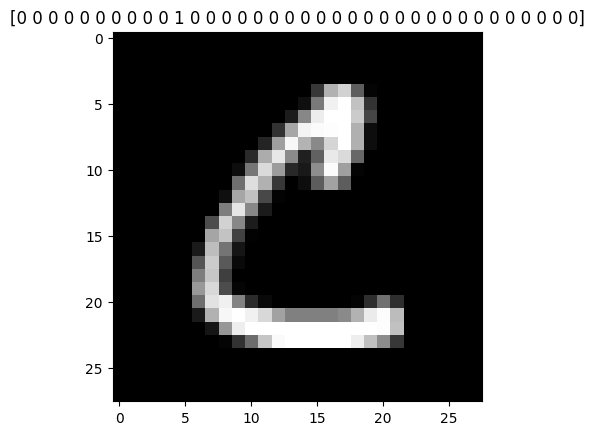

In [ ]:
# Check data with label binarizer's label
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [ ]:
# Since our data is not balance, we will handle it by giving weight for 'small' data

# Check number of data for each labels first
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Check the biggest value of data
classes_total.max()

57825

In [ ]:
# Create a weight for each data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Check the weight for each data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

**Penjelasan** : Pada tahap ini dilakukan tahap pra-pemrosesan data dan bagaimana kode program menangani ketidakseimbangan kelas sebelum data digunakan untuk pelatihan model

# Split Data to Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

**Penjelasan** : Pada tahap ini membagi dataset menjadi dua yaitu untuk test dan train. Rasio antara data yang digunakan untuk test dan train adalah 2:8. Yang berarti 20% data digunakan untuk test dan 80% dimanfaatkan untuk melakukan train.

## Create Data Augmentation

In [ ]:
# Import library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

**Penjelasan**: Kode program tersebut menggunakan modul ImageDataGenerator dari TensorFlow untuk melakukan augmentasi data pada gambar. `rotation_range` digunakan untuk memungkinkan gambar dapat dirotasi sebanyak 10x. `zoom_range` memungkinkan gambar dapat dilakukan zoom sebesar 5%. `width_shift_range` memungkinkan gambar dapat digeser secara horizontal sebanyak 10% dari lebar gambar. `height_shift_range` berfungsi agar gambar dapat dilakukan pegeseran vertikal sebanyak 10% dari tinggi gambar. `horizontal_flip` pada kode program nilai atribut ini false yang berarti flip horizontal tidak diterapkan.

# Build CNN Model

In [ ]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Build the network
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Check network summary
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
# Create actual labels
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Check actual label
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


**Penjelasan**: Pada tahap ini membuat model CNN memanfaatkan TensorFlow Keras. Tahap pertama yang harus dilakukan adalah mengimpor class yang diperlukan dari TensorFlow lalu membuat obyek CNN menggunakan model berurutan Sequential. Menambahkan tiga layer konvolusional dan tiga layer max pooling.
Layer konvolusional menggunakan filter ReLU untuk aktivasi.
Input gambar diharapkan berukuran (28, 28, 1). Lalu menambahkan layar flatter yang digunakan untuk meratakan output dari layer konvolusional menjadi vektor satu dimensi. Setelah itu menambahkan Layer Dense dan juga Layer Output. Saat layer sudah ditambahkan selanjutnya mengompilasi model dengan menggunakan categorical crossentropy sebagai fungsi kerugian, optimizer Adam, dan metrik akurasi lalu mencetak ringkasan dari arsitektur model neural network. Setelah itu membuat daftar label yang sesuai dengan kelas-kelas yang mungkin pada output softmax dan mencetak daftar label yang telah dibuat.

## Train model

In [ ]:
# Set model name, epoch, and batch size
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [ ]:
# Setup checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Fit the model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.1961 - accuracy: 0.8239
Epoch 1: val_loss improved from inf to 0.25807, saving model to custom_ocr.model
2765/2765 [==============================] - 153s 51ms/step - loss: 2.1961 - accuracy: 0.8239 - val_loss: 0.2581 - val_accuracy: 0.9082
Epoch 2/20
2764/2765 [============================>.] - ETA: 0s - loss: 1.0034 - accuracy: 0.9003
Epoch 2: val_loss improved from 0.25807 to 0.22800, saving model to custom_ocr.model
2765/2765 [==============================] - 132s 48ms/step - loss: 1.0033 - accuracy: 0.9003 - val_loss: 0.2280 - val_accuracy: 0.9064
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8324 - accuracy: 0.9130
Epoch 3: val_loss did not improve from 0.22800
2765/2765 [==============================] - 133s 48ms/step - loss: 0.8324 - accuracy: 0.9130 - val_loss: 0.2897 - val_accuracy: 0.8770
Epoch 4/20
2764/2765 [============================>.] - ETA: 0s - loss: 0.7412 - accu

**Penjelasan**: Pada tahap ini melatih model CNN. Berikut merupakan tahapan dalam melatih CNN: </br>
  1.  Menetapkan nama model (`file_model`), jumlah epochs (`epochs`), dan ukuran batch (`batch_size`) yang akan digunakan dalam proses pelatihan.
  2. Mengatur checkpoint untuk menyimpan model dengan kinerja terbaik berdasarkan nilai loss pada data validasi (`val_loss`). `save_best_only=True` akan menyimpan model hanya jika nilai loss pada epoch tersebut lebih baik daripada yang sebelumnya.
  3. Proses pelatihan model menggunakan metode `fit`. </br>
    - `augmentation.flow` digunakan untuk memberikan augmentasi data pada set pelatihan saat pelatihan berlangsung.
    - `X_train dan y_train` adalah data dan label pelatihan.
    - `validation_data=(X_test, y_test)` menyertakan data validasi untuk memantau kinerja model selama pelatihan.
    - `steps_per_epoch=len(X_train) // batch_size` menentukan jumlah langkah pelatihan per epoch. Ini dihitung sebagai panjang data pelatihan dibagi dengan ukuran batch.
    - `epochs=epochs` menentukan jumlah epochs (iterasi melalui seluruh dataset pelatihan).
    - `class_weight=classes_weights` memberikan bobot untuk setiap kelas berdasarkan distribusi kelas.
    - verbose=1 mengaktifkan output yang informatif selama pelatihan.
    - `callbacks=[checkpointer]` menggunakan callback ModelCheckpoint yang sudah diatur sebelumnya.

# Evaluate Model

## Make a Single Prediction

In [ ]:
# make a prediction
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [ ]:
# Check prediction for data-0
# You will get the probability for each label
# The highest one is the prediction
predictions[1]

array([6.28761298e-29, 1.03911435e-14, 3.87293795e-19, 4.83361740e-24,
       2.27750126e-21, 2.07476105e-17, 9.55681321e-25, 3.71754323e-18,
       1.53922576e-20, 1.24226137e-24, 1.49411114e-22, 5.70004424e-24,
       1.19806754e-15, 3.25817138e-18, 4.50411282e-20, 4.42914583e-19,
       4.42058567e-20, 9.04203039e-18, 1.00000000e+00, 2.65463251e-09,
       2.00019241e-18, 1.58350539e-14, 2.75013543e-30, 1.02993979e-20,
       2.21131996e-17, 2.14818660e-18, 1.35999164e-25, 9.47196712e-23,
       1.14782601e-17, 4.72959627e-09, 1.05445935e-15, 3.33965665e-22,
       9.02103385e-21, 1.37858475e-13, 4.03350530e-12, 2.00478197e-12],
      dtype=float32)

In [ ]:
# Get the actual prediction -> highest probability
np.argmax(predictions[1])

18

In [ ]:
# Check label for 24
name_labels[18]

'I'

In [ ]:
# Check y_test label for 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# check the highest value
np.argmax(y_test[1])

18

In [ ]:
# Check the label of y_test 0
name_labels[np.argmax(y_test[18])]

'S'

**Penjelasan:** Pada tahap ini membuat prediksi menggunakan model neural network yang telah dilatih.

## Make an Evaluation on Test Data

In [ ]:
# Evaluate on test data
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1366 - accuracy: 0.9569


[0.1365942806005478, 0.9569329619407654]

In [ ]:
# Print Classification Report
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.62      0.36      0.46      1381
           1       0.97      0.99      0.98      1575
           2       0.88      0.98      0.93      1398
           3       0.95      0.99      0.97      1428
           4       0.93      0.95      0.94      1365
           5       0.62      0.95      0.75      1263
           6       0.97      0.97      0.97      1375
           7       0.91      0.99      0.95      1459
           8       0.97      0.98      0.98      1365
           9       0.96      0.98      0.97      1392
           A       0.99      0.99      0.99      2774
           B       0.99      0.98      0.99      1734
           C       0.99      0.99      0.99      4682
           D       0.88      0.97      0.92      2027
           E       0.99      0.98      0.99      2288
           F       0.92      0.99      0.95       233
           G       0.95      0.96      0.96      1152
           H       0.97    

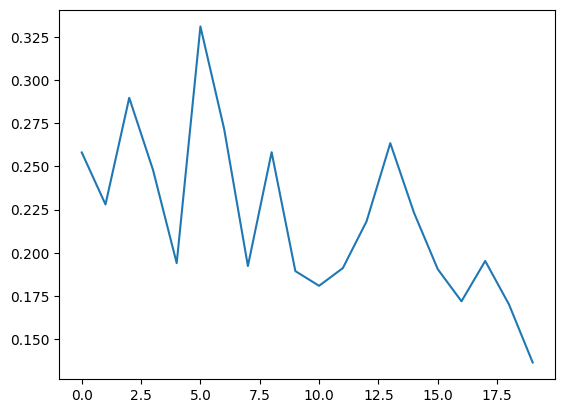

In [ ]:
# Visualize loss value for each epoch
plt.plot(history.history['val_loss'])

In [ ]:
# You can also check the another metrics
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

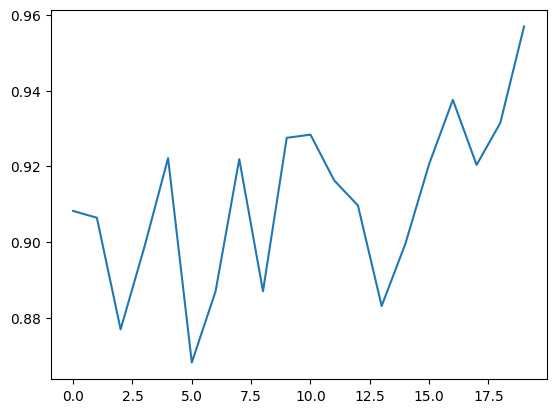

In [ ]:
# Check the model performance by validation accuracy
plt.plot(history.history['val_accuracy'])

**Penjelasan**: Pada tahap ini mengevaluasi kinerja model pada data uji setelah proses pelatihan. </br>
  1. Mengevaluasi data uji menggunakan model CNN `X_test` dan `y_test`.
  2. Mencetak laporan klasifikasi menggunakan `classification_report` yang mencakup precision, recall, f1-score, dan support untuk setiap kelas.
  3. Memvisualisasikan nilai Loss untuk setiap Epoch dengan menggunakan matplotlib pada data validasi `val_loss`.
  4. Memvisualisasikan nilai validation accuracy (`val_accuracy`) untuk setiap epoch selama proses pelatihan. Grafik ini memberikan gambaran tentang sejauh mana model berhasil mempelajari pola-pola pada data validasi. </br>
  
Dengan melakukan evaluasi dan visualisasi seperti ini, dapat memahami seberapa baik model kita dapat menggeneralisasi pada data yang belum pernah dilihat sebelumnya (data uji).

# Save The Model

In [ ]:
# The result will show in colab directory
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Penjelasan**: Pada tahap ini menyimpan model neural network ke dalam format berkas H5 (HDF5). Hasilnya, model neural network akan disimpan dalam berkas dengan nama 'network' dalam format H5 di direktori kerja Colab. Model yang telah disimpan ini dapat digunakan kembali di masa mendatang untuk melakukan prediksi atau melanjutkan pelatihan.

# Testing on Real Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import library
from tensorflow.keras.models import load_model

In [ ]:
# Load saved network
load_network = load_model('network')

In [ ]:
# Check summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

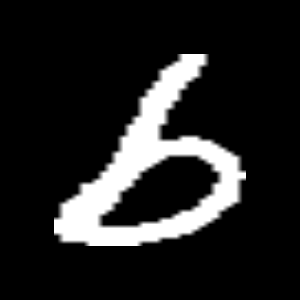

In [ ]:
# Load Image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/MachineLearning/Quiz 2/b_small.png')
cv2_imshow(img)

In [ ]:
# Check shape
img.shape

(300, 300, 3)

In [ ]:
# Convert to gray
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# check shape
gray_img.shape

(300, 300)

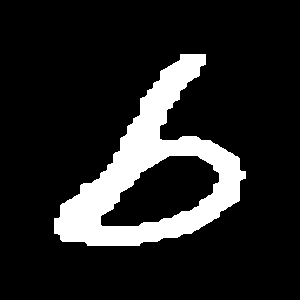

120.0


In [ ]:
# Pre-process
# Binary Threshold and Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print threshold value
print(value)

In [ ]:
# Resize image in order to match network input shape -> 28*28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [ ]:
# Convert to float 32
# and extend the dimension since network input shape is 28*28*1
img_input = img_resize.astype('float32') / 255 # also perform normalization
img_input = np.expand_dims(img_input, axis=-1) # insert depth

# check shape
img_input.shape

(28, 28, 1)

In [ ]:
# Add "amount of data" as dimension
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [ ]:
# Make a predition
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # predict actual label
pred_label

1/1 [==============================] - 0s 200ms/step


6

In [ ]:
# check label for 6
name_labels[6]

'6'

**Penjelasan**: Setelah model CNN dilatih dan ditesting maka model tersebut bekerja dengan baik pada saat dilakukan test menggunakan real image. Hasil pada saat testing real image terdapat kesalahan karena visual antara b_kecil dengan angka 6 hampir sama. Sehingga pada saat dilakukan pemrosesan dataset menggunakan model CNN, model mengenali dataset sebagai angka 6.